In [1]:
import pandas as pd


raw_df = pd.read_excel (r'/Users/swimmingcircle/cs156_code/assignments/Final_project/long_form_poll_responses_2019.xlsx')

In [2]:
#add time stamp as variable 
raw_df['time_stamp'] = raw_df['Polls ID'].rank(method = 'dense', ascending=True).astype(int)
raw_df.sort_values("time_stamp", inplace = True)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count')

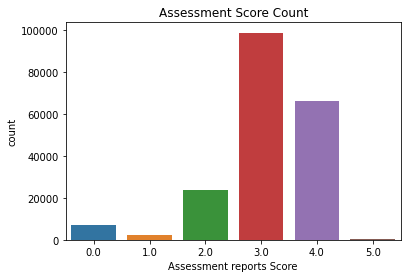

In [4]:
sns.countplot(raw_df['Assessment reports Score'])
plt.title('Assessment Score Count')

In [5]:
raw_df['Assessment reports Score'].mean()

3.0913772213247173

In [6]:
avg_grades = pd.DataFrame(raw_df.groupby('Assessment reports Hashtag')['Assessment reports Score'].agg(['mean', 'count']))
avg_grades = avg_grades.sort_values('mean', ascending= False).reset_index()

In [7]:
avg_grades

,Assessment reports Hashtag,mean,count
0,#histonemodifications,4.000000,2
1,#LPimplementation,4.000000,1
2,#networktheory,4.000000,2
3,#Participation,4.000000,3
4,#Preparedness,4.000000,1
...,...,...,...
798,#buckinghampi,2.307692,39
799,#DA,2.285714,49
800,#Rimplementation,2.178571,28
801,#accountability,1.750000,8


Might need to throw away data that doesn't have enough count. 

### Discard data 

- discard data that has NONE for Assessment reports Hashtag
- discard data that deosn't get graded 


In [8]:
df = raw_df[raw_df['Assessment reports Hashtag'] != 'NONE']
df = raw_df[raw_df['Assessment reports Score'] != 0.0]

In [9]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1
16,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1
15,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1
14,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1
13,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1
...,...,...,...,...,...,...
198045,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539
198046,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539
198047,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539
198034,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539


In [10]:
texts = df['Poll Responses Response']

In [11]:
texts

0         The strengths of Plato's approach is his const...
16        In the breakout we discussed if outside the ca...
15        I think he's good at reasoning, but he has thi...
14        Back to cmmon confusion time: the section 'und...
13        Most difficult weakness is that his position w...
                                ...                        
198045                                         Definiteness
198046    I think important propoerties of algorithms in...
198047    This is maybe not an additional property, but ...
198034    comprehensibility.  This is related to efficie...
198079    Adaptability: I'm not sure if it's actually ap...
Name: Poll Responses Response, Length: 191016, dtype: object

In [12]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
import os
import codecs
from sklearn import feature_extraction
from nltk.tokenize import RegexpTokenizer

In [13]:
# load nltk's English stopwords as variable called 'stopwords'
# use nltk.download() to install the corpus first
# Stop Words are words which do not contain important significance to be used in Search Queries
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [14]:
df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)

#remove numbers 
df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poll Responses Response'] = df['Poll Responses Response'].apply(str)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Poll Responses Response'] = df['Poll Responses Response'].str.replace(r'\d+','')
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2124817980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

# Tokenize and Stem 

In [15]:
tokenizer = RegexpTokenizer("[\w']+")
df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/646613428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_responses'] = df['Poll Responses Response'].map(tokenizer.tokenize)
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/646613428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_responses'] = df['tokenized_responses'].apply(lambda x: [stemmer.stem(y) for y in x])


Takes 2 min to tokenize the word. 

In [16]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"[The, strengths, of, Plato's, approach, is, hi...","[the, strength, of, plato, approach, is, his, ..."
16,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"[In, the, breakout, we, discussed, if, outside...","[in, the, breakout, we, discuss, if, outsid, t..."
15,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1,"[I, think, he's, good, at, reasoning, but, he,...","[i, think, he, good, at, reason, but, he, has,..."
14,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"[Back, to, cmmon, confusion, time, the, sectio...","[back, to, cmmon, confus, time, the, section, ..."
13,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"[Most, difficult, weakness, is, that, his, pos...","[most, difficult, weak, is, that, his, posit, ..."
...,...,...,...,...,...,...,...,...
198045,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539,[Definiteness],[definit]
198046,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539,"[I, think, important, propoerties, of, algorit...","[i, think, import, propoerti, of, algorithm, i..."
198047,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539,"[This, is, maybe, not, an, additional, propert...","[this, is, mayb, not, an, addit, properti, but..."
198034,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539,"[comprehensibility, This, is, related, to, eff...","[comprehens, this, is, relat, to, effici, in, ..."


In [17]:
df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
df['string'] = df['clean_responses'].apply(" ".join)

/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2055308800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_responses'] = df['stemmed_responses'].apply(lambda x: [item for item in x if item not in stopwords])
/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_88399/2055308800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['string'] = df['clean_responses'].apply(" ".join)


In [19]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('processed_response.zip', index=False,
          compression=compression_opts)  